# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [1]:
# The new version of dataset is only available in the tfds-nightly package.
%pip --no-cache-dir install tensorflow-datasets --user
%pip --no-cache-dir install tfds-nightly --user
%pip --no-cache-dir install tensorflow --user --upgrade
# DON'T MISS TO RESTART THE KERNEL

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 3.7MB 6.6MB/s eta 0:00:01     |████▋                           | 532kB 6.6MB/s eta 0:00:01     |███████████████████████████     | 3.1MB 6.6MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 22.8MB/s eta 0:00:01     |████▉                           | 153kB 22.8MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


     |████████                        | 98.0MB 25.6MB/s eta 0:00:12

     |████████▏                       | 100.6MB 25.6MB/s eta 0:00:12

     |████████▍                       | 103.2MB 27.4MB/s eta 0:00:11

     |████████▌                       | 104.5MB 27.4MB/s eta 0:00:11

     |████████▋                       | 105.8MB 27.4MB/s eta 0:00:11

     |████████▉                       | 108.5MB 27.4MB/s eta 0:00:11

     |█████████                       | 109.8MB 27.4MB/s eta 0:00:11

     |█████████                       | 111.2MB 27.4MB/s eta 0:00:11

     |█████████▏                      | 112.5MB 27.4MB/s eta 0:00:11

     |█████████▍                      | 115.1MB 27.4MB/s eta 0:00:11

     |█████████▍                      | 116.5MB 27.4MB/s eta 0:00:11

     |█████████▋                      | 119.2MB 27.4MB/s eta 0:00:11

     |█████████▊                      | 120.5MB 27.4MB/s eta 0:00:11

     |█████████▉                      | 121.9MB 27.4MB/s eta 0:00:10

     |██████████                      | 123.2MB 27.4MB/s eta 0:00:10

     |██████████▎                     | 127.2MB 27.4MB/s eta 0:00:10

     |██████████▌                     | 129.9MB 31.2MB/s eta 0:00:09

     |██████████▉                     | 133.6MB 31.2MB/s eta 0:00:09

     |███████████                     | 134.9MB 31.2MB/s eta 0:00:09

     |███████████▏                    | 137.3MB 31.2MB/s eta 0:00:09

     |███████████▎                    | 139.8MB 31.2MB/s eta 0:00:09

     |███████████▍                    | 141.1MB 31.2MB/s eta 0:00:09

     |███████████▋                    | 143.7MB 31.2MB/s eta 0:00:09

     |███████████▉                    | 146.4MB 31.2MB/s eta 0:00:08

     |████████████                    | 149.1MB 31.2MB/s eta 0:00:08

     |████████████▌                   | 154.4MB 29.3MB/s eta 0:00:09

     |████████████▊                   | 156.9MB 29.3MB/s eta 0:00:09

     |████████████▉                   | 158.3MB 29.3MB/s eta 0:00:09

     |█████████████                   | 159.6MB 29.3MB/s eta 0:00:09

     |█████████████                   | 160.9MB 29.3MB/s eta 0:00:08

     |█████████████▏                  | 162.3MB 29.3MB/s eta 0:00:08

     |█████████████▎                  | 163.6MB 29.3MB/s eta 0:00:08

     |█████████████▍                  | 164.9MB 29.3MB/s eta 0:00:08

     |█████████████▌                  | 166.2MB 29.3MB/s eta 0:00:08

     |█████████████▊                  | 168.8MB 29.3MB/s eta 0:00:08

     |█████████████▉                  | 170.1MB 29.3MB/s eta 0:00:08

     |██████████████                  | 171.4MB 29.3MB/s eta 0:00:08

     |██████████████▎                 | 175.5MB 29.3MB/s eta 0:00:08

     |██████████████▍                 | 178.1MB 26.7MB/s eta 0:00:09

     |██████████████▌                 | 179.3MB 26.7MB/s eta 0:00:09

     |██████████████▉                 | 183.1MB 26.7MB/s eta 0:00:08

     |███████████████                 | 185.5MB 26.7MB/s eta 0:00:08

     |███████████████▎                | 188.0MB 26.7MB/s eta 0:00:08

     |███████████████▍                | 189.2MB 26.7MB/s eta 0:00:08

     |███████████████▉                | 195.4MB 26.7MB/s eta 0:00:08

     |████████████████▏               | 199.2MB 26.7MB/s eta 0:00:08

     |████████████████▎               | 200.4MB 26.2MB/s eta 0:00:08

     |████████████████████████████████| 394.7MB 10.6MB/s eta 0:00:01     |████████████████▊               | 206.3MB 26.2MB/s eta 0:00:08     |████████████████▉               | 207.5MB 26.2MB/s eta 0:00:08     |█████████████████               | 208.7MB 26.2MB/s eta 0:00:08     |█████████████████               | 209.9MB 26.2MB/s eta 0:00:08     |█████████████████▏              | 212.3MB 26.2MB/s eta 0:00:07     |██████████████████▏             | 223.9MB 21.9MB/s eta 0:00:08     |██████████████████▎             | 225.2MB 21.9MB/s eta 0:00:08     |██████████████████▋             | 230.1MB 21.9MB/s eta 0:00:08     |██████████████████▉             | 232.6MB 21.9MB/s eta 0:00:08     |███████████████████▏            | 236.3MB 21.9MB/s eta 0:00:08     |███████████████████▊            | 243.6MB 21.9MB/s eta 0:00:07     |████████████████████            | 246.2MB 29.9MB/s eta 0:00:05     |████████████████████▏           | 248.8MB 29.9MB/s eta 0:00:05     |████████████████████▎           | 250.1MB 

     |██████████████████              | 8.1MB 34.8MB/s eta 0:00:01

     |████████████████████▉           | 9.4MB 34.8MB/s eta 0:00:01

     |███████████████████████▉        | 10.8MB 34.8MB/s eta 0:00:01

     |█████████████████████████████▉  | 13.5MB 34.8MB/s eta 0:00:01

     |████████████████████████████████| 14.5MB 34.8MB/s eta 0:00:01
     |████████████████████████████████| 122kB 52.8MB/s eta 0:00:01
     |████████████████████████████████| 788kB 38.0MB/s eta 0:00:01
     |████████████████████████████████| 163kB 19.4MB/s eta 0:00:01    |█████████████████████           | 102kB 19.4MB/s eta 0:00:01
     |████████████████████████████████| 51kB 8.2MB/s eta 0:00:011     |████████████████████▊           | 30kB 22.9MB/s eta 0:00:01
     |████████████████████████████████| 81kB 18.0MB/s eta 0:00:01
     |████████████████████████████████| 153kB 34.7MB/s eta 0:00:01
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=70984 sha256=18136994695e2c147256dd1bd430f19b85c18db7ea3a0be0da084da4097e1c94
  Stored in directory: /tmp/pip-ephem-wheel-cache-zjqq5g8x/wheels/b1/c2/ed/d62208260edbd3fa7156545c00ef966f45f2063d0a84f8208a
Successfully built wrapt
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --

In [1]:
# Import TensorFlow 
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
# TODO: Make all other necessary imports.
import matplotlib.pyplot as plt
import json
import numpy as np
from PIL import Image
import os 

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [3]:
# Download data to default local directory "~/tensorflow_datasets"
!python -m tensorflow_datasets.scripts.download_and_prepare  --datasets=oxford_flowers102

2021-01-01 11:22:15.777396: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-01-01 11:22:15.777546: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
W0101 11:22:18.593972 140281021904640 download_and_prepare.py:46] ***`tfds build` should be used instead of `download_and_prepare`.***
INFO[build.py]: Loading dataset oxford_flowers102 from imports: tensorflow_datasets.image_classification.oxford_flowers102
2021-01-01 11:22:18.678136: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Not found: Error executing an HTTP reques

Extraction completed...: 0 file [00:03, ? file/s]
Dl Size...:  19%|█████▏                      | 61/328 [00:03<00:09, 26.99 MiB/s]

Dl Size...:  19%|█████▎                      | 62/328 [00:03<00:09, 26.99 MiB/s]

Dl Size...:  19%|█████▍                      | 63/328 [00:03<00:09, 26.99 MiB/s]

Extraction completed...: 0 file [00:03, ? file/s]
Dl Size...:  20%|█████▍                      | 64/328 [00:03<00:09, 27.55 MiB/s]

Dl Size...:  20%|█████▌                      | 65/328 [00:03<00:09, 27.55 MiB/s]

Dl Size...:  20%|█████▋                      | 66/328 [00:03<00:09, 27.55 MiB/s]

Extraction completed...: 0 file [00:03, ? file/s]
Dl Size...:  20%|█████▋                      | 67/328 [00:03<00:09, 28.14 MiB/s]

Dl Size...:  21%|█████▊                      | 68/328 [00:03<00:09, 28.14 MiB/s]

Dl Size...:  21%|█████▉                      | 69/328 [00:03<00:09, 28.14 MiB/s]

Extraction completed...: 0 file [00:03, ? file/s]
Dl Size...:  21%|█████▉                      | 70/328 [00:03<0

Dl Size...:  45%|████████████▎              | 149/328 [00:06<00:06, 27.40 MiB/s]

Dl Size...:  46%|████████████▎              | 150/328 [00:06<00:06, 27.40 MiB/s]

Extraction completed...: 0 file [00:06, ? file/s]
Dl Size...:  46%|████████████▍              | 151/328 [00:06<00:06, 27.36 MiB/s]

Dl Size...:  46%|████████████▌              | 152/328 [00:06<00:06, 27.36 MiB/s]

Dl Size...:  47%|████████████▌              | 153/328 [00:06<00:06, 27.36 MiB/s]

Extraction completed...: 0 file [00:06, ? file/s]
Dl Size...:  47%|████████████▋              | 154/328 [00:06<00:06, 25.72 MiB/s]

Dl Size...:  47%|████████████▊              | 155/328 [00:06<00:06, 25.72 MiB/s]

Dl Size...:  48%|████████████▊              | 156/328 [00:06<00:06, 25.72 MiB/s]

Extraction completed...: 0 file [00:06, ? file/s]
Dl Size...:  48%|████████████▉              | 157/328 [00:07<00:06, 26.34 MiB/s]

Dl Size...:  48%|█████████████              | 158/328 [00:07<00:06, 26.34 MiB/s]

Dl Size...:  48%|█████████████

Dl Size...:  59%|███████████████▉           | 194/328 [00:08<00:04, 27.07 MiB/s]

Dl Size...:  59%|████████████████           | 195/328 [00:08<00:04, 27.07 MiB/s]

Extraction completed...: 0 file [00:08, ? file/s]
Dl Size...:  60%|████████████████▏          | 196/328 [00:08<00:04, 27.51 MiB/s]

Dl Size...:  60%|████████████████▏          | 197/328 [00:08<00:04, 27.51 MiB/s]

Dl Size...:  60%|████████████████▎          | 198/328 [00:08<00:04, 27.51 MiB/s]

Extraction completed...: 0 file [00:08, ? file/s]
Dl Size...:  61%|████████████████▍          | 199/328 [00:08<00:04, 27.77 MiB/s]

Dl Size...:  61%|████████████████▍          | 200/328 [00:08<00:04, 27.77 MiB/s]

Dl Size...:  61%|████████████████▌          | 201/328 [00:08<00:04, 27.77 MiB/s]

Extraction completed...: 0 file [00:08, ? file/s]
Dl Size...:  62%|████████████████▋          | 202/328 [00:08<00:04, 28.13 MiB/s]

Dl Size...:  62%|████████████████▋          | 203/328 [00:08<00:04, 28.13 MiB/s]

Dl Size...:  62%|█████████████

Dl Size...:  73%|███████████████████▊       | 240/328 [00:10<00:03, 27.17 MiB/s]

Extraction completed...: 0 file [00:10, ? file/s]
Dl Size...:  73%|███████████████████▊       | 241/328 [00:10<00:03, 26.82 MiB/s]

Dl Size...:  74%|███████████████████▉       | 242/328 [00:10<00:03, 26.82 MiB/s]

Dl Size...:  74%|████████████████████       | 243/328 [00:10<00:03, 26.82 MiB/s]

Extraction completed...: 0 file [00:10, ? file/s]
Dl Size...:  74%|████████████████████       | 244/328 [00:10<00:03, 27.21 MiB/s]

Dl Size...:  75%|████████████████████▏      | 245/328 [00:10<00:03, 27.21 MiB/s]

Dl Size...:  75%|████████████████████▎      | 246/328 [00:10<00:03, 27.21 MiB/s]

Extraction completed...: 0 file [00:10, ? file/s]
Dl Size...:  75%|████████████████████▎      | 247/328 [00:10<00:02, 27.56 MiB/s]

Dl Size...:  76%|████████████████████▍      | 248/328 [00:10<00:02, 27.56 MiB/s]

Dl Size...:  76%|████████████████████▍      | 249/328 [00:10<00:02, 27.56 MiB/s]

Extraction completed...: 0 fil

Dl Size...:  87%|███████████████████████▍   | 285/328 [00:11<00:01, 27.29 MiB/s]

Dl Size...:  87%|███████████████████████▌   | 286/328 [00:11<00:01, 27.29 MiB/s]

Extraction completed...: 0 file [00:11, ? file/s]
Dl Size...:  88%|███████████████████████▋   | 287/328 [00:11<00:01, 25.19 MiB/s]

Dl Size...:  88%|███████████████████████▋   | 288/328 [00:11<00:01, 25.19 MiB/s]

Dl Size...:  88%|███████████████████████▊   | 289/328 [00:11<00:01, 25.19 MiB/s]

Extraction completed...: 0 file [00:11, ? file/s]
Dl Size...:  88%|███████████████████████▊   | 290/328 [00:11<00:01, 26.05 MiB/s]

Dl Size...:  89%|███████████████████████▉   | 291/328 [00:11<00:01, 26.05 MiB/s]

Dl Size...:  89%|████████████████████████   | 292/328 [00:11<00:01, 26.05 MiB/s]

Extraction completed...: 0 file [00:11, ? file/s]
Dl Size...:  89%|████████████████████████   | 293/328 [00:12<00:01, 26.65 MiB/s]

Dl Size...:  90%|████████████████████████▏  | 294/328 [00:12<00:01, 26.65 MiB/s]

Dl Size...:  90%|█████████████

Extraction completed...:   0%|                         | 0/1 [00:13<?, ? file/s]

Dl Size...: 100%|███████████████████████████| 328/328 [00:19<00:00, 26.64 MiB/s]

Extraction completed...: 100%|█████████████████| 1/1 [00:19<00:00, 19.46s/ file]

Dl Size...: 100%|███████████████████████████| 328/328 [00:19<00:00, 16.85 MiB/s]

Generating train examples...:  85%|▊| 863/1020 [00:00<00:00, 1560.71 examples/s]
                                                                                
Shuffling oxford_flowers102-train.tfrecord...:   0%| | 0/1020 [00:00<?, ? examples/s]
INFO[tfrecords_writer.py]: Done writing oxford_flowers102-train.tfrecord. Number of examples: 1020 (shards: [1020])
Generating test examples...:  98%|▉| 6053/6149 [00:03<00:00, 1936.43 examples/s]
                                                                                
Shuffling oxford_flowers102-test.tfrecord...:  99%|▉| 6101/6149 [00:00<00:00, 15409.73 examples/s]
INFO[tfrecords_writer.py]: Done writing oxford_

In [4]:
# TODO: Load the dataset with TensorFlow Datasets. Hint: use tfds.load()
dataset , dataset_info = tfds.load('oxford_flowers102',with_info=True,as_supervised=True)
# TODO: Create a training set, a validation set and a test set.
training_set = dataset['train']
validation_set = dataset['validation']
test_set = dataset['test']

## Explore the Dataset

In [5]:
# TODO: Get the number of examples in each set from the dataset info.
for k in dataset_info.splits:
    print( 'the {} dataset  has {} examples'.format(k,dataset_info.splits[k].num_examples))
# TODO: Get the number of classes in the dataset from the dataset info.
print ('number of classes is' ,dataset_info.features['label'].num_classes)

the train dataset  has 1020 examples
the test dataset  has 6149 examples
the validation dataset  has 1020 examples
number of classes is 102


In [6]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for image, label in training_set.take(3):
    print('image shape :{} , image label : {}'.format(image.shape , label))



image shape :(500, 667, 3) , image label : 72
image shape :(500, 666, 3) , image label : 84
image shape :(670, 500, 3) , image label : 70


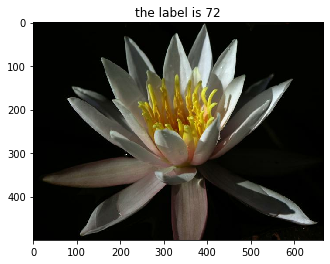

In [7]:
# TODO: Plot 1 image from the training set. 
for image, label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()
    plt.imshow(image)
    plt.title('the label is {}'.format(label))
    plt.show()

# Set the title of the plot to the corresponding image label. 

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [8]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

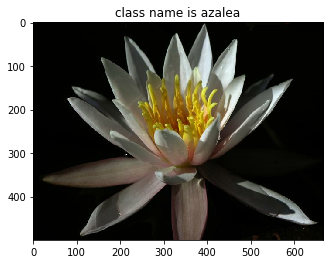

In [9]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
for image, label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()
    plt.imshow(image)
    plt.title('class name is {}'.format(class_names[str(label)]))
    plt.show()


## Create Pipeline

In [10]:
# TODO: Create a pipeline for each set.
batch_size = 16
image_size = 224

num_training_examples = dataset_info.splits['train'].num_examples

def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image, label


training_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(format_image).batch(batch_size).prefetch(1)
testing_batches = test_set.map(format_image).batch(batch_size).prefetch(1)


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [16]:
from workspace_utils import active_session

with active_session():
    # TODO: Build and train your network.
    URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
    feature_extractor = hub.KerasLayer(URL, input_shape=(image_size, image_size,3))
    feature_extractor.trainable = False
    model = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
            tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1,0.1),
            tf.keras.layers.experimental.preprocessing.RandomRotation(0.4),
            tf.keras.layers.experimental.preprocessing.RandomZoom(-0.20),
            feature_extractor,
            tf.keras.layers.Dropout(0.5),                      
            tf.keras.layers.Dense(102, activation = 'softmax')])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    EPOCH = 100

    early = tf.keras.callbacks.EarlyStopping(patience=5)
    store = tf.keras.callbacks.ModelCheckpoint('flower_classifier_regular.h5',save_best_only=True)

    history = model.fit(training_batches , epochs=EPOCH,validation_data=validation_batches , callbacks= [early,store],verbose=1)

Epoch 1/100
64/64 [==============================] - 50s 700ms/step - loss: 5.4711 - accuracy: 0.0168 - val_loss: 3.3743 - val_accuracy: 0.2676
Epoch 2/100
64/64 [==============================] - 44s 691ms/step - loss: 3.2697 - accuracy: 0.2105 - val_loss: 2.4054 - val_accuracy: 0.4902
Epoch 3/100
64/64 [==============================] - 44s 694ms/step - loss: 2.1737 - accuracy: 0.4688 - val_loss: 1.9384 - val_accuracy: 0.5706
Epoch 4/100
64/64 [==============================] - 44s 693ms/step - loss: 1.7508 - accuracy: 0.5610 - val_loss: 1.6870 - val_accuracy: 0.6078
Epoch 5/100
64/64 [==============================] - 44s 685ms/step - loss: 1.4511 - accuracy: 0.6378 - val_loss: 1.5374 - val_accuracy: 0.6363
Epoch 6/100
64/64 [==============================] - 44s 686ms/step - loss: 1.3303 - accuracy: 0.6506 - val_loss: 1.3969 - val_accuracy: 0.6549
Epoch 7/100
64/64 [==============================] - 44s 690ms/step - loss: 1.0697 - accuracy: 0.7209 - val_loss: 1.3313 - val_accuracy:

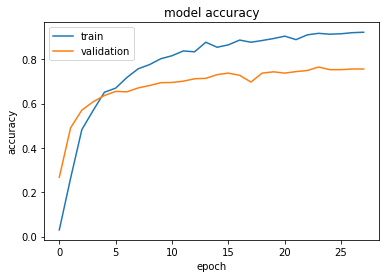

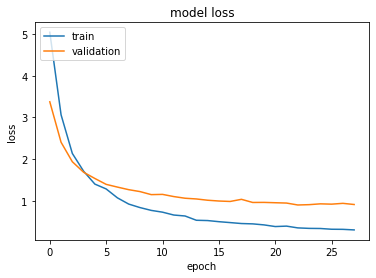

In [18]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [30]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

model.evaluate(testing_batches)

385/385 [==============================] - 112s 290ms/step - loss: 1.0780 - accuracy: 0.7273


[1.0779532194137573, 0.7272727489471436]

## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [ ]:
# TODO: Save your trained model as a Keras model.
# I already did with early stopping


## Load the Keras Model

Load the Keras model you saved above.

In [11]:
# TODO: Load the Keras model

loaded_model = tf.keras.models.load_model('flower_classifier_regular.h5',custom_objects={'KerasLayer': hub.KerasLayer})


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [12]:
# TODO: Create the process_image function
image_size = 224
def process_image(image):
    image = tf.convert_to_tensor(image)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    return image


To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

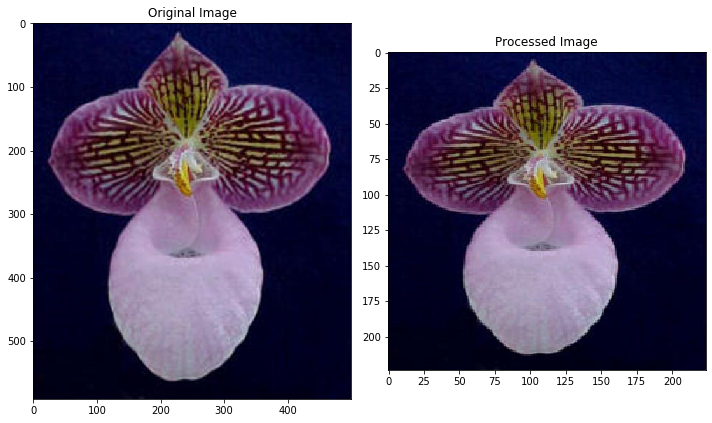

In [13]:


image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [14]:
# TODO: Create the predict function
def predict(image_path, saved_model, top_k):
    model = tf.keras.models.load_model(saved_model,custom_objects={'KerasLayer': hub.KerasLayer})
    im = Image.open(image_path)
    image = np.asarray(im)    
    image = process_image(image)
    image = np.expand_dims(image, axis=0)
    result = model.predict(image)
    top_index = np.flip((result.argsort(axis=1))[0][-1*top_k:])
    top_classes = top_index+1
    probs = result[0][top_index]
    
    return (probs,top_classes)

In [15]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

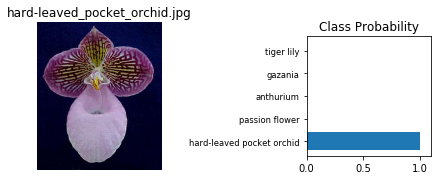

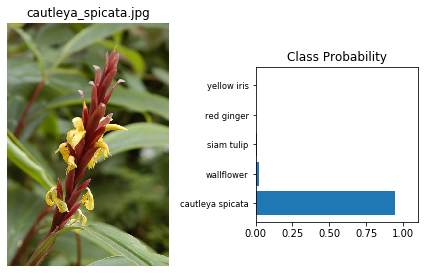

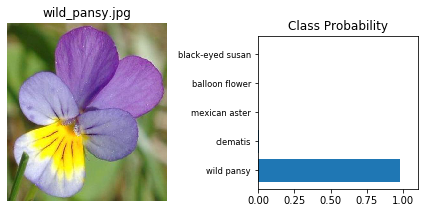

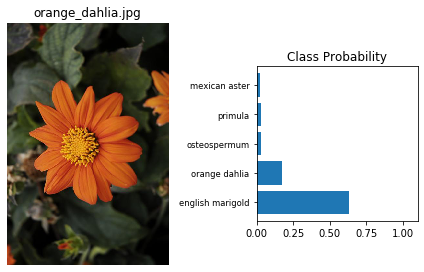

In [16]:
# TODO: Plot the input image along with the top 5 classes
for file in os.listdir('./test_images'):
    path = './test_images/' + file
    probs, classes = predict(path,'flower_classifier_regular.h5' , 5)
    im = Image.open(path)
    image = np.asarray(im)
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax1.set_title(file)
    ax2.barh(np.arange(5), probs)
    ax2.set_aspect(0.2)
    ax2.set_yticks(np.arange(5))
    class_name = [class_names[str(a)] for a in classes]
    ax2.set_yticklabels(class_name, size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

### Refrences:
    1-https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/#:~:text=Access%20Model%20Training%20History%20in%20Keras&text=It%20records%20training%20metrics%20for,used%20to%20train%20the%20model.